# Student ID: XXX

**You student_id is your 7/8 digit faser number.**

This is a sample format for CE807-24-SP: Assignment . You must follow the format.
The code will have three broad sections, and additional section, if needed,


1.   Common Codes
2.   Method/model 1 Specific Codes
3.   Method/model 2 Specific Codes
4.   Other Method/model Codes, if any

**You must have `train_gen`, `test_gen` for Generative method  and `train_dis`, `test_dis` for Discriminatuve method to perform full training and testing. This will be evaluated automatically, without this your code will fail and no marked.**

You code should be proverly indended, print as much as possible, follow standard coding (https://peps.python.org/pep-0008/) and documentaion (https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.01-Help-And-Documentation.ipynb) practices.

Before each `code block/function`, you must have a `text block` which explain what code block/function is going to do. For each function/class, you need to properly document what are it's input, functionality and output.

If you are using any non-standard library, you must have command to install that, for example `pip install datasets`.

You must print `train`, `validation` and `test` performance measures.

You must also print `train` and `validation` loss in each `epoch`, wherever you are using `epoch`, say in any deep learning algorithms.

Your code must

*   To reproducibality of the results you must use a `seed`, you have to set seed in `torch`, `numpy` etc, use same seed everywhere **and your Student ID should be your seed**.
*   read dataset from './student_id/data/number/', where number is last digit of your student_id folder which will have 3 files [`train.csv`, `val.csv`, `test.csv`]
*   save model after finishing the training in './student_id/Model_Gen/' and './student_id/Model_Dis/' for Generative and Discriminative model respectively.
*   at testing time you will load models from './student_id/Model_Gen/' and './student_id/Model_Dis/'  for Generative and Discriminative model respectively. Your output file based on the test file will be named “test.csv” and you will add/modify “out_label_model_Gen” and “out_label_model_Dis” column in the existing columns from test.csv. These outputs will be generated from your trained models.
*  after testing, your output file will be named “test.csv” and you will add/modify “out_label_model_Gen” and “out_label_model_Dis” column in the existing columns from test.csv. These outputs will be generated from your trained models.




**Install and import all required libraries first before starting to code.**








Let's install all require libraries. For example, `transformers`

In [ ]:
!pip install nltk

Let's import all require libraries.
For example, `numpy`

In [ ]:
import numpy as np
import os
import pickle
import pandas as pd
import nltk
from nltk.stem import PorterStemmer

**Let's put your student id as a variable, that you will use different places**

In [ ]:
student_id = 20118000 # Note this is an interger and you need to input your id

Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [ ]:
# set same seeds for all libraries

#numpy seed
np.random.seed(student_id)

# Common Codes

In this section you will write all common codes, for examples


*   Data read
*   Command Line argument reading
*   Performance Matrics
*   Print Dataset Statistics
*   Saving model and output
*   Loading Model and output
*   etc




**Let's first allow the GDrive access and set data and model paths**

For examples,

student_id = 12345670

set GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = ‘./CE807-24-SP/Lab10/’ in your GDrive

now set all global variable,


Sample output directory and file structure: https://drive.google.com/drive/folders/1okgSzgGiwPYYFp7NScEt9MNVolOlld1d?usp=share_link   

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Add your code to initialize GDrive and data and models paths

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '/content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/'
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

DATA_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'data', '3') # Make sure to replace 0 with last digit of your student Regitration number
train_file = os.path.join(DATA_PATH, 'train.csv')
print('Train file: ', train_file)

val_file = os.path.join(DATA_PATH, 'valid.csv')
print('Validation file: ', val_file)

test_file = os.path.join(DATA_PATH, 'test.csv')
print('Test file: ', test_file)


MODEL_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'model', str(student_id)) # Make sure to use your student Regitration number
MODEL_Gen_DIRECTORY = os.path.join(MODEL_PATH, 'Model_Gen') # Model Generative directory
print('Model Generative directory: ', MODEL_Gen_DIRECTORY)

MODEL_Gen_File = MODEL_Gen_DIRECTORY + '.zip'


MODEL_Dis_DIRECTORY = os.path.join(MODEL_PATH, 'Model_Dis') # Model Discriminative directory
print('Model Discriminative directory: ', MODEL_Dis_DIRECTORY)

MODEL_Dis_File = MODEL_Dis_DIRECTORY + '.zip'


List files:  ['data', 'model', 'output', 'code.ipynb', 'code_knerry.ipynb']
Train file:  /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/data/3/train.csv
Validation file:  /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/data/3/valid.csv
Test file:  /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/data/3/test.csv
Model Generative directory:  /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Gen
Model Discriminative directory:  /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Dis


Let's see train file

In [ ]:
train_df = pd.read_csv(train_file)
train_df.head()

,comment_id,comment,split,toxicity
0,56405359.0,SDATA_3 : NEWLINE_TOKENNEWLINE_TOKEN== Cunt E...,train,0
1,150969639.0,SDATA_3 : NEWLINE_TOKENNEWLINE_TOKEN== RfD cl...,train,1
2,89626571.0,SDATA_3 : `NEWLINE_TOKENNEWLINE_TOKENNEWLINE_...,train,0
3,422545153.0,SDATA_3 : NEWLINE_TOKEN:: I see. Just you kn...,train,0
4,10377960.0,SDATA_3 : `NEWLINE_TOKEN#Link if someone fol...,train,0


Let's show you a sample output file. Notice all fields, `out_label` is your model's output for that `tweet` and `id`

We are going to use different performance matrics like Accuracy, Recall (macro), Precision (macro), F1 (macro) and Confusion Matrix for the performance evaluation. We will print all the matrics and display Confusion Matrix with proper X & Y axis labels

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def compute_performance(y_true, y_pred):
    """
    Prints different performance metrics like Accuracy, Recall (macro), Precision (macro), and F1 (macro).
    This also displays Confusion Matrix with proper X & Y axis labels.
    Also, returns F1 score.

    Args:
        y_true: numpy array or list
            True labels.
        y_pred: numpy array or list
            Predicted labels.

    Returns:
        float
            F1 score.
    """

    ##########################################################################
    #                     TODO: Implement this function                      #
    ##########################################################################

    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Recall (weighted):", recall)
    print("Precision (weighted):", precision)
    print("F1 (weighted):", f1)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    ##########################################################################
    #                            END OF YOUR CODE                            #
    ##########################################################################

    return accuracy, recall, precision, f1




In [ ]:

import re
import string

def text_pre(text):
    # Remove metadata
    text = re.sub(r'SDATA_3|EDATA_3|NEWLINE_TOKEN', '', text)

    # tokenize the data
    tokens = re.split(r'\W+', text)

    # stem the words using porter stemmer
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # remove special characters
    tokens = [''.join(c for c in token if c not in string.punctuation) for token in tokens]

    # convert to lowercase
    tokens = [token.lower() for token in tokens]

    # remove extra whitespace
    text = ' '.join(tokens)

    return text

def save_model(model,model_dir):
  # save the model to disk
  # Check if the Model directory exists

  # Note you might have to modify this based on your requirement

  if not os.path.exists(model_dir):
      # Create the directory if it doesn't exist
      os.makedirs(model_dir)
      print(f"Directory '{model_dir}' created successfully.")
  else:
      print(f"Directory '{model_dir}' already exists.")

  model_file = os.path.join(model_dir, 'model.sav')
  pickle.dump(model, open(model_file, 'wb'))

  print('Saved model to ', model_file)

  return model_file

def load_model(model_file):
    # load model from disk

    # Note you might have to modify this based on your requirement

    model = pickle.load(open(model_file, 'rb'))

    print('Loaded model from ', model_file)

    return model

def get_model(model_gdrive_link, test_model_file, test_model_path, extra_path):

    # Now download and unzip the model file
    download_zip_file_from_link(model_gdrive_link, test_model_file)
    print('Model downloaded to', test_model_file)

    unzip_file(test_model_file, test_model_path)
    print('\n Model is downloaded to ',test_model_path)


    model_path = test_model_path+extra_path

    return model_path

def load_and_split(file, file2):
    data = pd.read_csv(file)
    data2 = pd.read_csv(file2)
    data['comment'] = data['comment'].apply(text_pre)
    data2['comment'] = data2['comment'].apply(text_pre)
    X_train = data['comment']
    y_train = data['toxicity']

    X_val = data2['comment']
    y_val = data2['toxicity']

    return X_train, y_train, X_val, y_val

# Let's download GDrive Link into a directory

In [ ]:
import requests

def extract_file_id_from_url(url):
    # Extract the file ID from the URL
    file_id = None
    if 'drive.google.com' in url:
        file_id = url.split('/')[-2]
    elif 'https://docs.google.com' in url:
        file_id = url.split('/')[-1]

    return file_id

def download_file_from_drive(file_id, file_path):
    # Construct the download URL
    download_url = f"https://drive.google.com/uc?id={file_id}"

    # Download the file
    response = requests.get(download_url)
    if response.status_code == 200:
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print("File downloaded successfully!",file_path)
    else:
        print("Failed to download the file.")

def download_zip_file_from_link(file_url,file_path):

  file_id = extract_file_id_from_url(file_url)
  if file_id:
      download_file_from_drive(file_id, file_path)
  else:
      print("Invalid Google Drive URL.")


# Zip and Unzip a GDrive File

In [ ]:
import zipfile
import shutil
import os

# Function to zip a directory
def zip_directory(directory, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(directory):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), os.path.join(directory, '..')))
        print('Created a zip file',zip_filename)


# Function to unzip a zip file
def unzip_file(zip_filename, extract_dir):
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print('Extracted a zip file to',extract_dir)

# Example usage:
directory_to_zip = '/content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Dis'
zip_filename = 'Model_Dis.zip'

# zip_directory(directory_to_zip, zip_filename)

# # Unzip the zip file
# extract_dir = 'path/to/extract'
# unzip_file(zip_filename, extract_dir)



# Get Sharable link of your Zip file in Gdrive

In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


def get_gdrive_link(file_path):
    # Authenticate and create PyDrive client
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    # Find the file in Google Drive
    file_name = file_path.split('/')[-1]
    file_list = drive.ListFile({'q': f"title='{file_name}'"}).GetList()

    # Get the file ID and generate the shareable link
    if file_list:
        file_id = file_list[0]['id']
        gdrive_link = f"https://drive.google.com/file/d/{file_id}/view?usp=sharing"
        return gdrive_link
    else:
        return "File not found in Google Drive"

def get_shareable_link(url):

    file_id = extract_file_id_from_url(url)

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    try:
        file_obj = drive.CreateFile({'id': file_id})
        file_obj.FetchMetadata()
        file_obj.InsertPermission({
            'type': 'anyone',
            'value': 'anyone',
            'role': 'reader'
        })

        # Get the shareable link
        return file_obj['alternateLink']
    except Exception as e:
        print("Error:", e)
        return None

# if __name__ == "__main__":
#     # Replace 'YOUR_FILE_ID' with the ID of the file you want to share
#     file_id = 'YOUR_FILE_ID'
#     shareable_link = get_shareable_link(file_id)
#     if shareable_link:
#         print("Shareable link:", shareable_link)
#     else:
#         print("Failed to generate shareable link.")


# Method Generative Start

In this section you will write all details of your Method 1.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model


You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import os


# Load the dataset
train_data = pd.read_csv(train_file)
valid_data = pd.read_csv(val_file)
test_data = pd.read_csv(test_file)

# Explore the data
print("Train data shape:", train_data.shape)
print("Valid data shape:", valid_data.shape)
print("Test data shape:", test_data.shape)

# Check for missing values
print("Missing values in train data:")
print(train_data.isnull().sum())

Train data shape: (8699, 4)
Valid data shape: (2920, 4)
Test data shape: (2896, 5)
Missing values in train data:
comment_id    0
comment       0
split         0
toxicity      0
dtype: int64


Toxicity distribution in train data:
toxicity
0    0.869985
1    0.130015
Name: proportion, dtype: float64


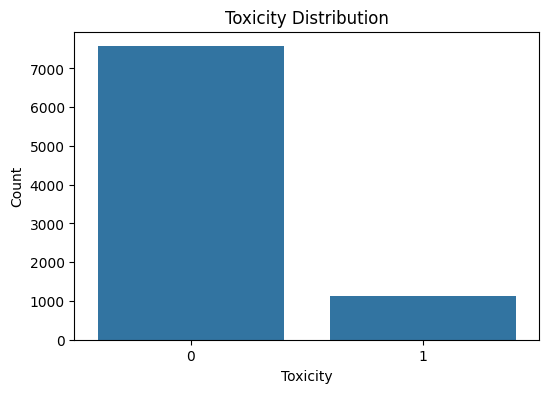

In [ ]:
# Distribution of toxic vs. non-toxic comments
toxic_distribution = train_data['toxicity'].value_counts(normalize=True)
print("Toxicity distribution in train data:")
print(toxic_distribution)

# Visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='toxicity')
plt.title('Toxicity Distribution')
plt.xlabel('Toxicity')
plt.ylabel('Count')
plt.show()


## Training Generative Method Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.

Directory '/content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Gen' already exists.
Saved model to  /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Gen/model.sav
Accuracy: 0.8681506849315068
Recall (weighted): 0.8681506849315068
Precision (weighted): 0.7878080547569386
F1 (weighted): 0.8081707741927774


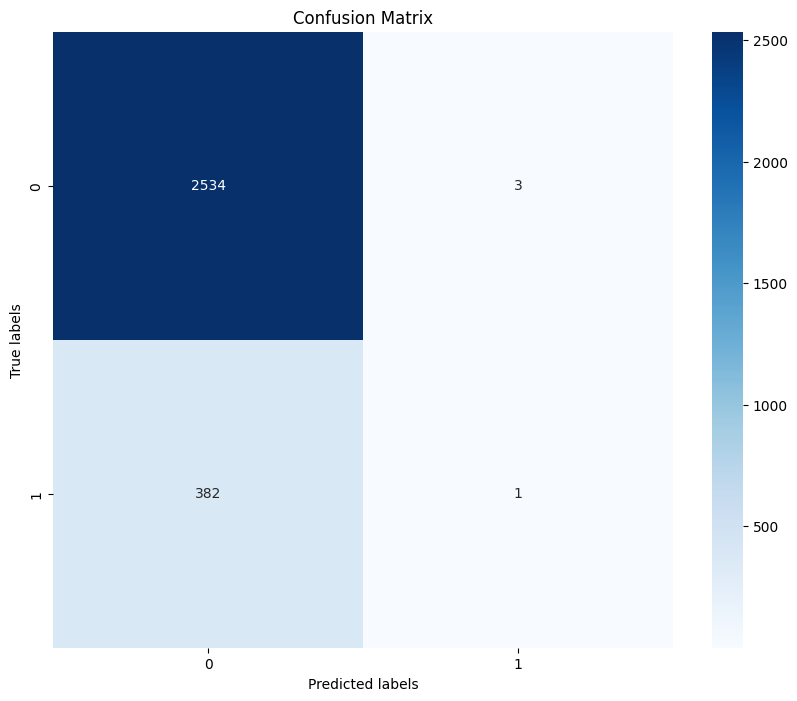

Created a zip file /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Gen.zip


In [ ]:
import pandas as pd
import os
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


def train_Gen(train_file, val_file, model_dir):
    """
    Takes train_file, val_file, and model_dir as input.
    It trains on the train_file datapoints and validates on the val_file datapoints.
    While training and validating, it prints different evaluation metrics and losses, wherever necessary.
    After finishing the training, it saves the best model in the model_dir.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory

    """

    X_train, y_train, X_val, y_val = load_and_split(train_file, val_file)

    # Preprocess train data (if necessary)
    # For example, vectorize the text data
    vectorizer = CountVectorizer(max_df=0.85, ngram_range=(1, 3))

    # Train the model
    model = MultinomialNB()


    # Create a pipeline with vectorizer and model
    model_pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('model', model)
    ])

    # Fit the pipeline on the training set
    model_pipeline.fit(X_train, y_train)

    # Save the model
    save_model(model_pipeline, model_dir)

    # Predict on validation set using the pipeline
    y_pred_val = model_pipeline.predict(X_val)

    # Compute the performance and print the metrics
    compute_performance(y_val, y_pred_val)

    # Now Zip Model to share it
    zip_directory(model_dir, MODEL_Gen_File)

    model_gdrive_link = get_gdrive_link(MODEL_Gen_File)

    link = get_shareable_link(model_gdrive_link)

    return link

model_gdrive_link_gen = train_Gen(train_file, val_file, MODEL_Gen_DIRECTORY)

## Testing Method 1 Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [ ]:
import pandas as pd
import os
import joblib
import pickle

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def test_Gen(test_file, model_file, model_gdrive_link_gen):
    """
    Test the generative model on the provided test dataset.

    Args:
        test_file (str): Path to the test file.
        model_file (str): Path to the model file.
        model_gdrive_link: GDrive URL

    Returns:
        pd.DataFrame: DataFrame containing model predictions.
    """

    print('Start by loading the model')

    test_model_file = MODEL_PATH+'/Model_Gen.zip'
    test_model_path = MODEL_PATH+'/test/'
    extra_path = '/Model_Gen/model.sav'

    model_path = get_model(model_gdrive_link_gen, test_model_file, test_model_path, extra_path)

    # Load the model
    model= load_model(model_path)

    # Load test data
    test_df = pd.read_csv(test_file)
    test_df['comment'] = test_df['comment'].apply(text_pre)

    # Predict using the loaded model
    y_pred = model.predict(test_df['comment'])

    # Add predictions to the DataFrame
    test_df['out_label_model_Gen'] = y_pred

    # Save the DataFrame with predictions
    test_df.to_csv(test_file, index=False)
    print('Predictions saved to', test_file)

    return test_df


test_Gen(test_file, MODEL_Gen_DIRECTORY, model_gdrive_link_gen)


Start by loading the model
File downloaded successfully! /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Gen.zip
Model downloaded to /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Gen.zip
Extracted a zip file to /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/test/

 Model is downloaded to  /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/test/
Loaded model from  /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/test//Model_Gen/model.sav
Predictions saved to /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/data/3/test.csv


,comment_id,comment,split,out_label_model_Gen,out_label_model_Dis
0,648048011.0,you stupid fat bastard whi did you censor the...,test,0,-1
1,128987732.0,imag dienbienphu jpg list for delet an imag o...,test,0,-1
2,137267590.0,combin note and citat section in ipa hi from ...,test,0,-1
3,180983347.0,stop vandal you iranian bastard,test,0,-1
4,46063987.0,3rr ha violat 3rr on ann coulter pleas see,test,0,-1
...,...,...,...,...,...
2891,69309863.0,i m sure they are all sockpuppet it can t be ...,test,0,-1
2892,315429118.0,it s use to sign your contribut with four til...,test,0,-1
2893,591122793.0,nice to have our own suparman readi to fli an...,test,0,-1
2894,315676187.0,ni hao plz do not ban me then i will eat a ha...,test,0,-1


## Method Generative End


# Method Discriminative Start

In this section you will write all details of your Method 2.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model

You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


## Training Method Discriminative Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

Accuracy: 0.8410958904109589
Recall (weighted): 0.8410958904109589
Precision (weighted): 0.7681090474241966
F1 (weighted): 0.7994761757684996


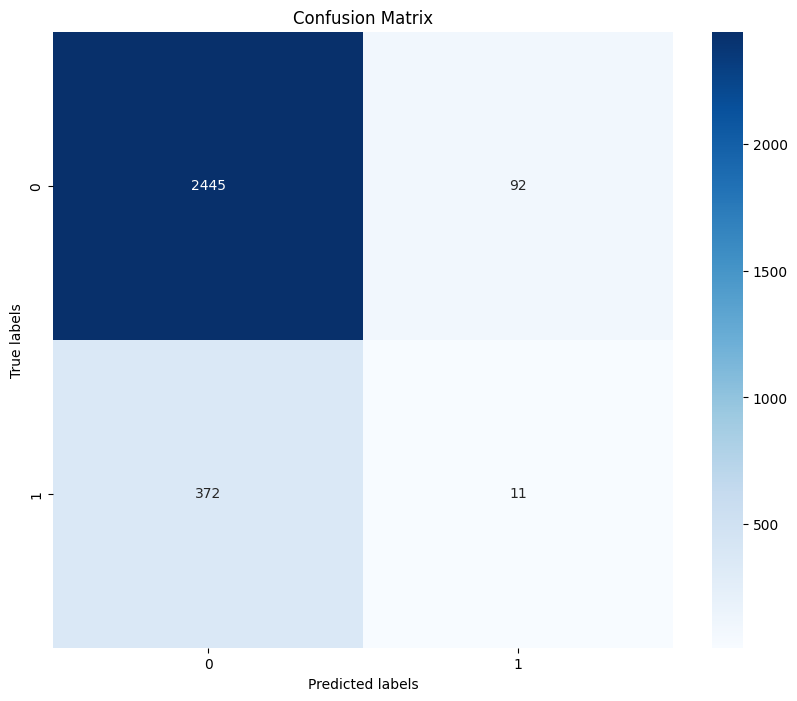

Directory '/content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Dis' already exists.
Saved model to  /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Dis/model.sav
Model saved to: /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Dis
Created a zip file /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Gen.zip


In [ ]:
import pandas as pd
import os
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
import joblib

def train_dis(train_file, val_file, model_dir):
    """
    Train the discriminative model using the provided train and validation files,
    and save the trained model in the specified model directory.

    Args:
        train_file (str): Path to the train file.
        val_file (str): Path to the validation file.
        model_dir (str): Directory to save the trained model.

    Returns:
        str: Path to the saved model.
    """

    X_train, y_train, X_val, y_val = load_and_split(train_file, val_file)

    # Preprocess train data (if necessary)
    # For example, vectorize the text data
    vectorizer = CountVectorizer(max_df=0.85, ngram_range=(1, 3))


    # Train the model
    model = LogisticRegression(class_weight='balanced',
                               random_state=student_id,
                               max_iter=250,
                               n_jobs=-1)

    # Create a pipeline with vectorizer and model
    model_pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('model', model)
    ])

    model_pipeline.fit(X_train, y_train)


    y_pred_val = model_pipeline.predict(X_val)

    compute_performance(y_val, y_pred_val)

    save_model(model_pipeline, model_dir)
    print("Model saved to:", model_dir)

    # Now Zip Model to share it
    zip_directory(model_dir, MODEL_Gen_File)

    model_gdrive_link = get_gdrive_link(MODEL_Gen_File)

    link = get_shareable_link(model_gdrive_link)

    return link


model_gdrive_link_dis = train_dis(train_file, val_file, MODEL_Dis_DIRECTORY)

## Testing Method Discriminative Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [ ]:
import pandas as pd
import os
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def test_dis(test_file, MODEL_PATH, output_dir):
    """
    Test the discriminative model on the provided test dataset.

    Args:
        test_file (str): Path to the test file.
        MODEL_PATH (str): Directory where the model is stored.
        output_dir (str): Output directory for saving the predictions.

    Returns:
        str: Path to the CSV file containing model predictions.
    """

    print('\nStart by downloading and loading the model')

    test_model_file = MODEL_PATH+'/Model_Dis.zip'
    test_model_path = MODEL_PATH+'/test/'
    extra_path = '/Model_Dis/model.sav'

    model_path_dis = get_model(model_gdrive_link_gen, test_model_file, test_model_path, extra_path)

    dis_model_pipeline = load_model(model_path_dis)
    # Load test data
    test_df_dis = pd.read_csv(test_file)
    test_df_dis['comment'] = test_df_dis['comment'].apply(text_pre)

    # Predict using the loaded pipeline
    y_pred = dis_model_pipeline.predict(test_df_dis['comment'])


    test_df_dis['out_label_model_Dis'] = y_pred

    test_df_dis.to_csv(test_file, index=False)
    print('Predictions saved to', test_file)

    return test_df_dis


test_dis(test_file, MODEL_Dis_DIRECTORY, model_gdrive_link_dis)



Start by downloading and loading the model
File downloaded successfully! /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Dis/Model_Dis.zip
Model downloaded to /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Dis/Model_Dis.zip
Extracted a zip file to /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Dis/test/

 Model is downloaded to  /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Dis/test/
Loaded model from  /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Dis/test//Model_Dis/model.sav
Predictions saved to /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/data/3/test.csv


,comment_id,comment,split,out_label_model_Gen,out_label_model_Dis
0,648048011.0,you stupid fat bastard whi did you censor the...,test,0,0
1,128987732.0,imag dienbienphu jpg list for delet an imag o...,test,0,0
2,137267590.0,combin note and citat section in ipa hi from ...,test,0,0
3,180983347.0,stop vandal you iranian bastard,test,0,0
4,46063987.0,3rr ha violat 3rr on ann coulter plea see,test,0,0
...,...,...,...,...,...
2891,69309863.0,i m sure they are all sockpuppet it can t be ...,test,0,0
2892,315429118.0,it s use to sign your contribut with four til...,test,0,0
2893,591122793.0,nice to have our own suparman readi to fli an...,test,0,0
2894,315676187.0,ni hao plz do not ban me then i will eat a ha...,test,0,0


## Discriminative Method  End


# Other Method/model Start

In [ ]:
import argparse

In [ ]:
# Define argparse-like function
def parse_arguments(option):
    parser = argparse.ArgumentParser(description='Process some integers.')
    parser.add_argument('--option', '-o',  type=str, default=option, help='Description of your option.')
    args = parser.parse_args(args=[])
    return args

# Function to perform some action based on selected option
def perform_action(option):
    print("Performing action with option:", option)

    if option == '0':
      print('\n Okay Exiting!!! ')

    elif option == '1':
      print('\n Training Generative Model')
      model_gdrive_link_gen = train_Gen(train_file, val_file, MODEL_Gen_DIRECTORY)
      print('Make sure to pass model URL in Testing',model_gdrive_link_gen)

    elif option == '2':
      print('\n\n Pass the URL Not Variable !!!')
      print('\n Testing Generative Model')
      model_gen_url = ''
      test_Gen(test_file, model_gen_url)

    elif option == '3':
      print('\n Training Disciminative Model')
      model_gdrive_link_dis = train_dis(train_file, val_file, MODEL_Dis_DIRECTORY)
      print('Make sure to pass model URL in Testing',model_gdrive_link_dis)
      print('\n\n Pass the URL Not Variable !!!')

    elif option == '4':
      print('\n\n Pass the URL Not Variable !!!')
      print('\n Testing Disciminative Model')
      model_dis_url = ''
      test_dis(test_file, MODEL_PATH, model_dis_url)

    else:
      print('Wrong Option Selected. \n\nPlease select Correct option')
      main()


def main():

    # Get option from user input
    user_option = input("0. To Exit Code\n"
                     "1. Train Model Generative\n"
                    "2. Test Model Generative\n"
                    "3. Train Model Discriminative\n"
                    "4. Test Model Discriminative\n"
                    "Enter your option: ")

    args = parse_arguments(user_option)
    option = args.option
    perform_action(option)


0. To Exit Code
1. Train Model Generative
2. Test Model Generative
3. Train Model Discriminative
4. Test Model Discriminative
Enter your option: 1
Performing action with option: 1

 Training Generative Model
Directory '/content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Gen' already exists.
Saved model to  /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Gen/model.sav
Accuracy: 0.8681506849315068
Recall (weighted): 0.8681506849315068
Precision (weighted): 0.7878080547569386
F1 (weighted): 0.8081707741927774


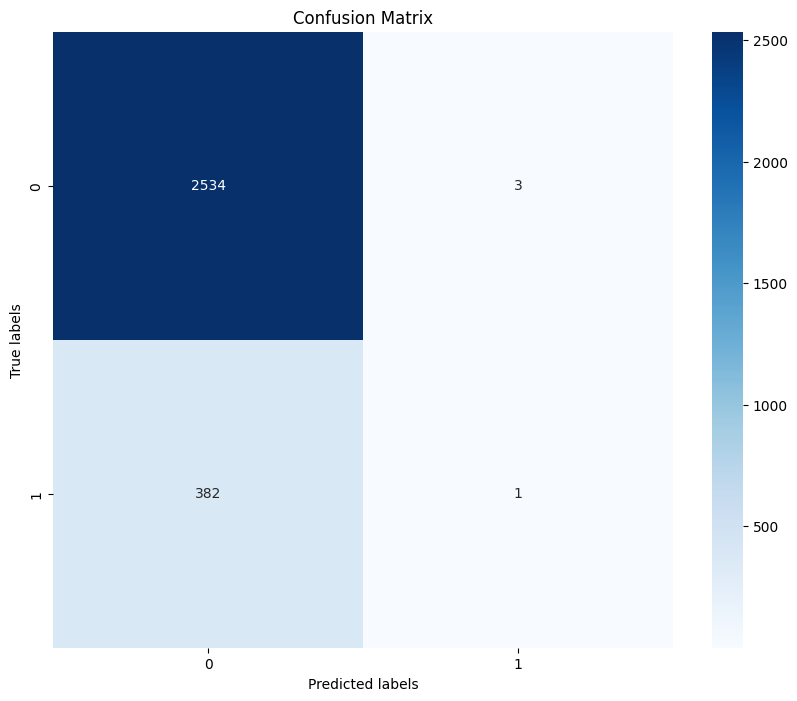

Created a zip file /content/gdrive/MyDrive/Colab Notebooks/CE807-24-SP/Assignment/model/2311843/Model_Gen.zip
Make sure to pass model URL in Testing https://drive.google.com/file/d/1pyPMHpeI_YLz_z7NNhVsTDL4P1iqNL3E/view?usp=drivesdk


In [ ]:
main()

In [ ]:
model_dis_url = 'https://drive.google.com/file/d/1--sJNJMLFvAz77HjiB8is8DDHOfY0FBG/view?usp=sharing'
test_dis(test_file, MODEL_PATH, model_dis_url)

##Other Method/model End